# First let's discover our data before doing Analysis

## Import libraries

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)

## Import Data

In [2]:
df = pd.read_csv("loan_data.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Statistics and Info about data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### First from infos
- There's 614 rows
- 13 values are missing from Gender
- 03 values are missing from Married
- 15 values are missing from dependents
- 32 values are missing from Self_Employed
- 22 values are missing from LoanAmount
- 14 values are missing from Loan_Amount_Term
- 50 values are missing from Credit_History

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Value Counts for specific columns

In [7]:
df["Married"].value_counts(normalize = True)

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

**65%** of our applicants are Married

In [8]:
df["Gender"].value_counts(normalize = True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

**81%** of our applicants are Males

In [9]:
df["Dependents"].value_counts(normalize = True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

**57.6%** of our applicants have 0 dependents while there's only nearly **9%** of our applicants has 3 or more dependents

In [10]:
df["Education"].value_counts(normalize = True)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

**78%** are graduates

In [11]:
df["Self_Employed"].value_counts(normalize = True)

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

**86%** are slef employed

In [12]:
df["Property_Area"].value_counts(normalize = True)

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64

**38%** of our applicants came from semiurban Area

In [13]:
df["Loan_Status"].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

**68%** of Loan has been approved

In [14]:
df["Credit_History"].value_counts(normalize = True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

**84%** has Credit History

In [17]:
df["Loan_Amount_Term"].value_counts(normalize = True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
240.0    0.006667
84.0     0.006667
120.0    0.005000
60.0     0.003333
36.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

**85.333 %** are for 360 days

In [18]:
df["ApplicantIncome"].value_counts(normalize = True)

2500    0.014658
4583    0.009772
6000    0.009772
2600    0.009772
3333    0.008143
          ...   
3244    0.001629
4408    0.001629
3917    0.001629
3992    0.001629
7583    0.001629
Name: ApplicantIncome, Length: 505, dtype: float64

**1.4 %** of our applicants has income of 2500

In [15]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [19]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


There is a positive correlation between ApplicantIncome and LoanAmount, CoapplicantIncome and LoanAmount.

In [21]:
di_1 = {"Y":1, "N":0}
df.replace({"Loan_Status": di_1}, inplace = True)

In [22]:
column_1 = df["ApplicantIncome"]
column_2 = df["Loan_Status"]
correlation = column_1. corr(column_2)
print(correlation)

-0.00470952265935152


In [23]:
column_1 = df["CoapplicantIncome"]
column_2 = df["Loan_Status"]
correlation = column_1. corr(column_2)
print(correlation)

-0.0591873134878501


In [24]:
di_2 = {"Yes":1, "No":0}
df.replace({"Married": di_2}, inplace = True)

In [25]:
column_1 = df["Married"]
column_2 = df["Loan_Status"]
correlation = column_1. corr(column_2)
print(correlation)

0.089280223813357


In [29]:
df.head(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,0.0,0,Graduate,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,1.0,1,Graduate,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,1.0,0,Graduate,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,1.0,0,Not Graduate,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,0.0,0,Graduate,0.0,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,1.0,2,Graduate,1.0,5417,4196.0,267.0,360.0,1.0,Urban,1
6,LP001013,Male,1.0,0,Not Graduate,0.0,2333,1516.0,95.0,360.0,1.0,Urban,1


In [27]:
df.replace({"Self_Employed": di_2}, inplace = True)

In [28]:
column_1 = df["Self_Employed"]
column_2 = df["Loan_Status"]
correlation = column_1. corr(column_2)
print(correlation)

-0.0023028551628650486


In [30]:
di_3 = {"Graduate":1, "Not Graduate":0}
df.replace({"Education": di_3}, inplace = True)

In [31]:
column_1 = df["Education"]
column_2 = df["Loan_Status"]
correlation = column_1. corr(column_2)
print(correlation)

0.08588391467536521


In [36]:
di_4 = {"Male":1, "Female":0}
df.replace({"Gender": di_4}, inplace = True)
column_1 = df["Gender"]
column_2 = df["Loan_Status"]
correlation = column_1. corr(column_2)
print(correlation)

0.019857021688307115


From our first insights we see that the visualization will solve the ambiguity of our data to see when the loan will be approved

In [37]:
import seaborn as sns

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

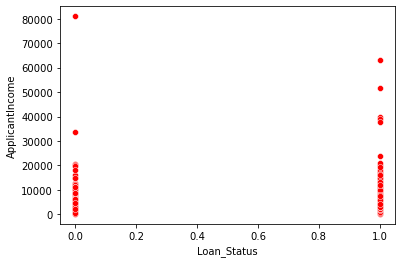

In [40]:
sns.scatterplot(x='Loan_Status',y='ApplicantIncome',color='r',data=df)

Loan is Accepted when  you have slightly more income

<AxesSubplot:xlabel='Married', ylabel='ApplicantIncome'>

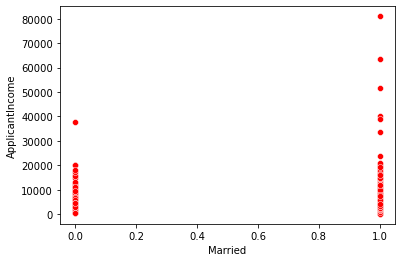

In [42]:
sns.scatterplot(x='Married',y='ApplicantIncome',color='r',data=df)

Married applicants have higher income Maybe because they have a partner that is working and we can see that more than 70k is refused and loan status is terminated

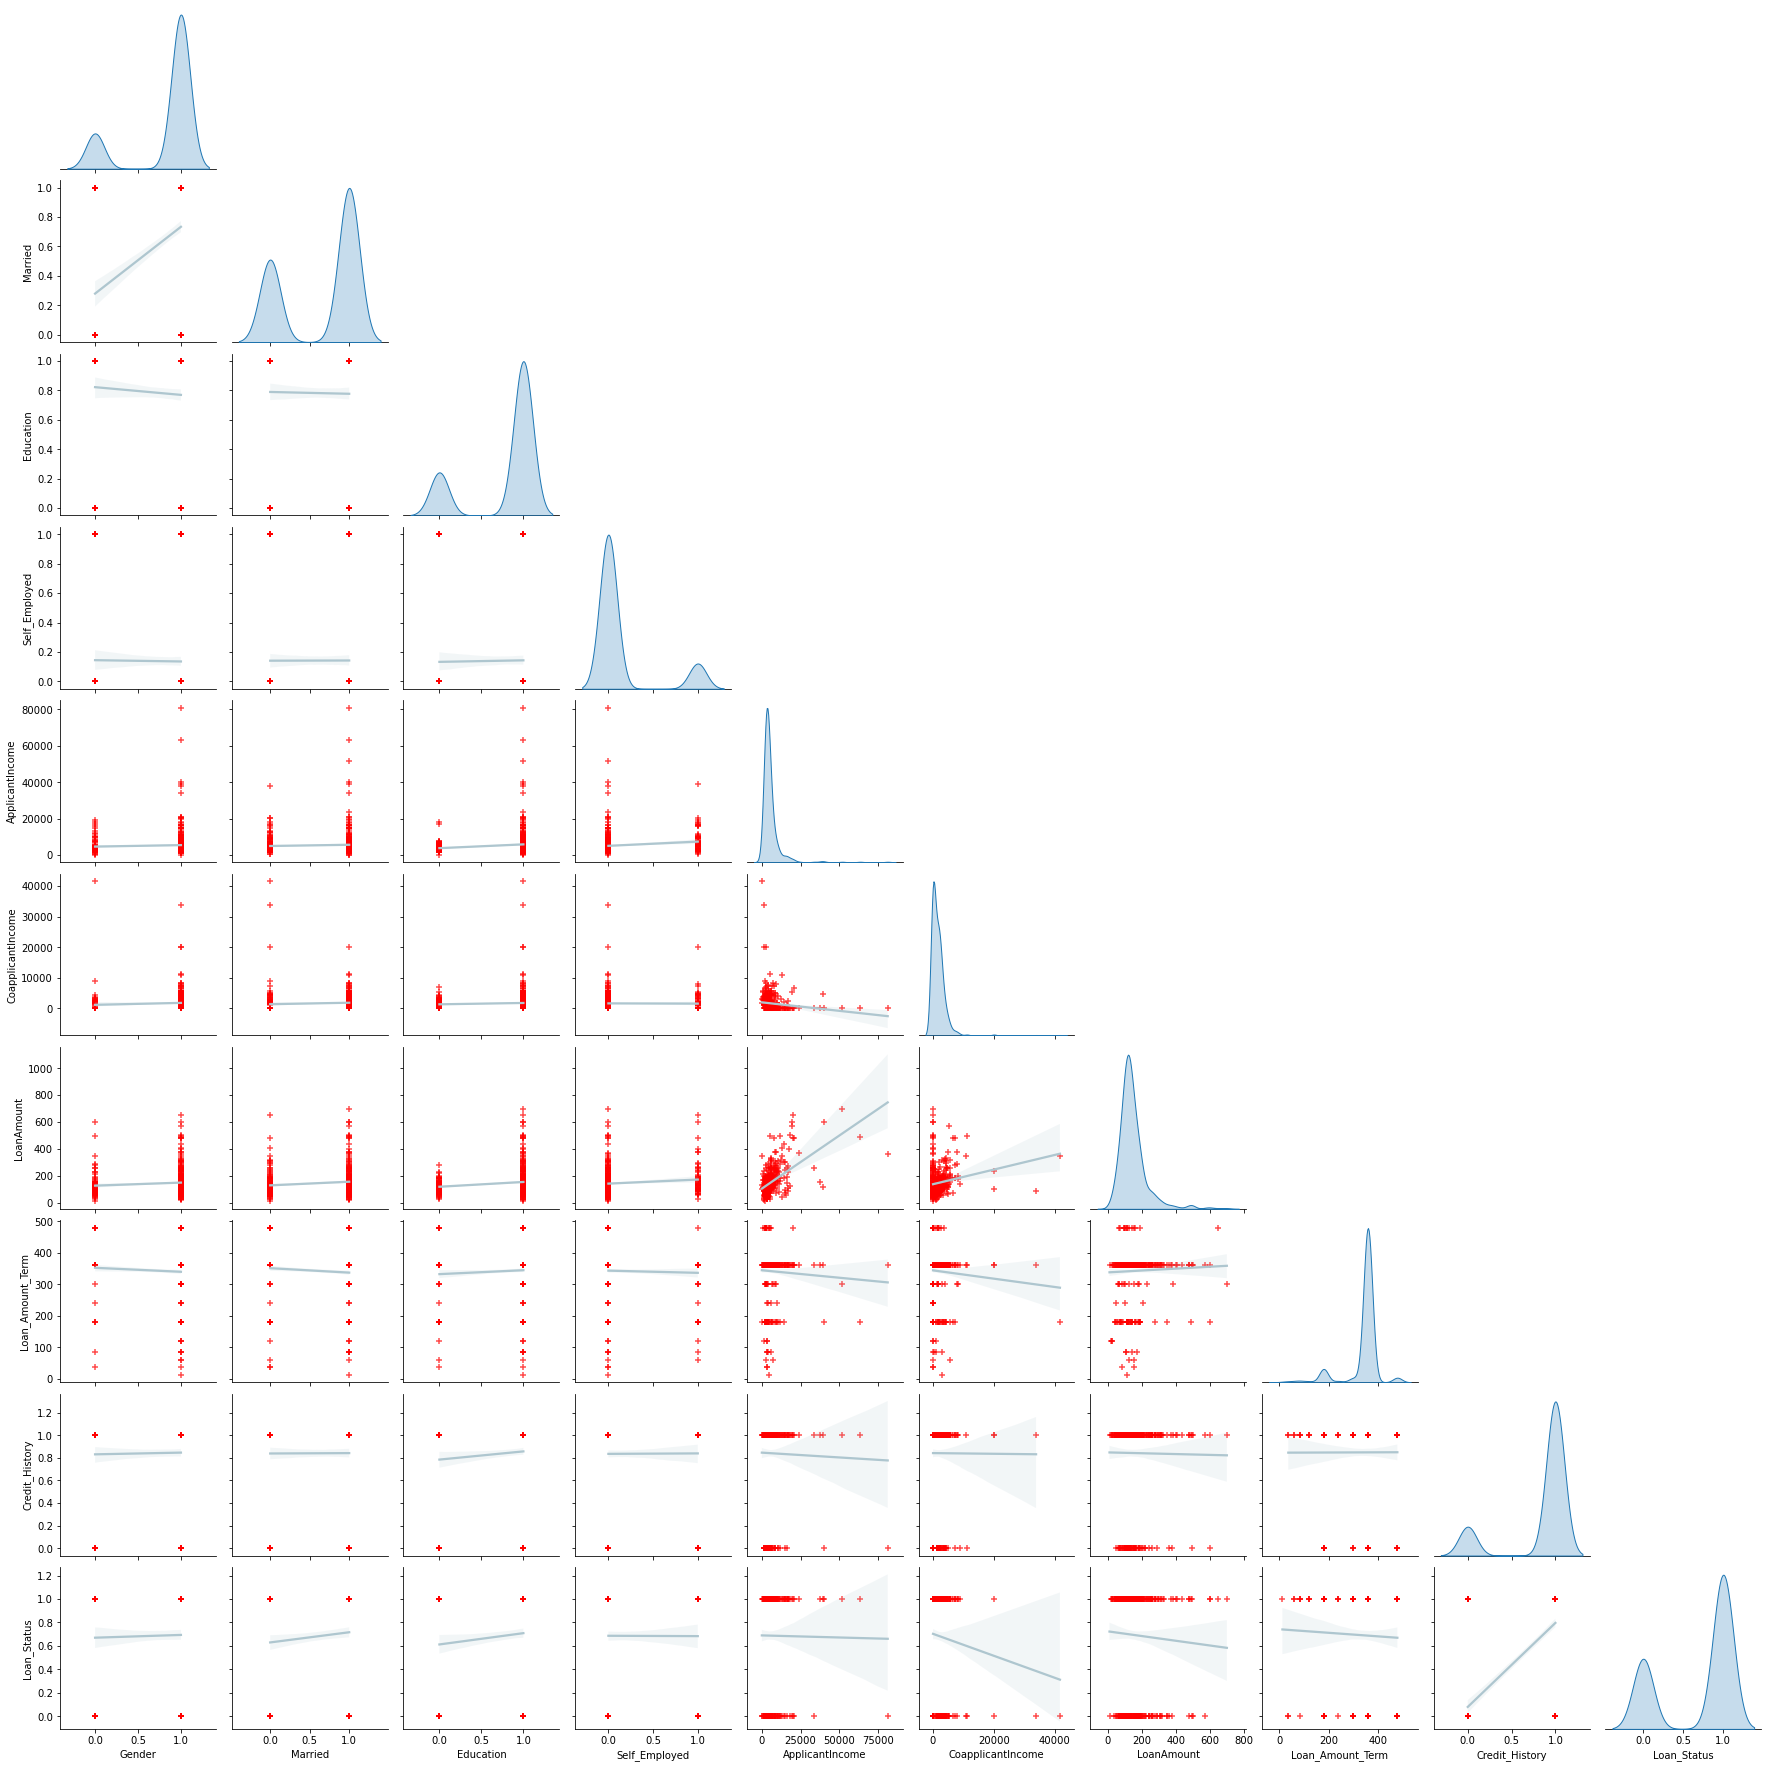

In [43]:
sns.pairplot(df, 
                 markers="+",
                 diag_kind="kde",
                 kind='reg',
                 plot_kws={'line_kws':{'color':'#aec6cf'}, 
                           'scatter_kws': {'alpha': 0.7, 
                                           'color': 'red'}},
                 corner=True);

**From our graph**
- Married people have asked for loan ammount more than un-married ones
- Males have asked for loan amount more than females
- Males have higher income than females
- Coapplicants of un-Married people have higher income than married